# Clase 11. LDA y Regresión logística

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [ ]:
pip install wooldridge

In [ ]:
import wooldridge as wd
mroz = wd.data('mroz')

In [ ]:
wd.data('mroz', description=True)

name of dataset: mroz
no of variables: 22
no of observations: 753

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| inlf     | =1 if in lab frce, 1975         |
| hours    | hours worked, 1975              |
| kidslt6  | # kids < 6 years                |
| kidsge6  | # kids 6-18                     |
| age      | woman's age in yrs              |
| educ     | years of schooling              |
| wage     | est. wage from earn, hrs        |
| repwage  | rep. wage at interview in 1976  |
| hushrs   | hours worked by husband, 1975   |
| husage   | husband's age                   |
| huseduc  | husband's years of schooling    |
| huswage  | husband's hourly wage, 1975     |
| faminc   | family income, 1975             |
| mtr      | fed. marg. tax rte facing woman |
| motheduc | mother's years of schooling     |
| fatheduc | father's years of schooling     |
| unem     | unem. rate in county of res

## Clasificación con regresión lineal

$$y=\textbf{X}\textbf{b}$$

Dos problemas:
 - Heterocedasticidad
 - Probabilidades podrían no estar entre 0 y 1

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = mroz.pop('inlf')
X = mroz.filter(['nwifeinc','educ','exper','expersq','age','kidslt6','kidsge6'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_lr = reg.predict(X_train)

In [ ]:
y_pred = reg.predict(X_test)
y_clas = np.zeros(len(y_pred), dtype=int)

for pos,j in enumerate(y_pred):
  if j>=0.5:
    y_clas[pos] = 1
  else:
    y_clas[pos] = 0

In [ ]:
y_clas

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

### Métricas

1. Matriz de confusión


||Pr|Nr|
|---|---|---
|Pe|TP|FP|
|Ne|FN|TN|

Error tipo I: falso positivo

Error tipo II: falso negativo

2. Accuracy score

$$\frac{TP+TN}{TP+TN+FP+FN}$$

3. Recall (sensitivity) score

$$\frac{TP}{TP+FN}$$

4. Precision score

$$\frac{TP}{TP+FP}$$

5. F1 score

$$\frac{2 \text{ x precision x recall}}{\text{precision+recall}}$$

6. Specificity

$$\frac{TN}{TN+FP}$$

7. ROC curve: Sensitivity vs. 1 - specificity

8. Precision-recall curve




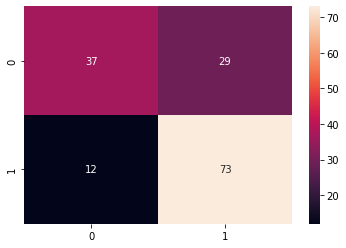

In [ ]:
cm = confusion_matrix(y_test, y_clas)

sns.heatmap(cm, annot=True)

In [ ]:
print(f'Accuracy_score: {accuracy_score(y_test,y_clas)}')
print(f'Recall score: {recall_score(y_test, y_clas)}')
print(f'F1 score: {f1_score(y_test, y_clas)}')
print(f'Precision score: {precision_score(y_test, y_clas)}')

Accuracy_score: 0.7284768211920529
Recall score: 0.8588235294117647
F1 score: 0.7807486631016043
Precision score: 0.7156862745098039


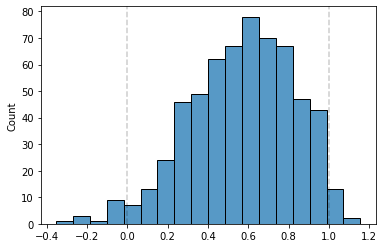

In [ ]:
sns.histplot(model_lr)
plt.axvline(0, color='k', alpha=0.2, ls='--')
plt.axvline(1, color='k', alpha=0.2, ls='--')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

ns_probs = np.zeros(len(y_test))
reg_pred = reg.predict(X_test)
ns_auc = roc_auc_score(y_test, ns_probs)
reg_auc = roc_auc_score(y_test, reg_pred)


In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
reg_fpr, reg_tpr, _ = roc_curve(y_test, reg_pred)

Text(0.5, 1.0, 'ROC curve')

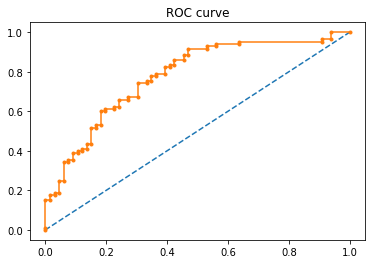

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(reg_fpr,reg_tpr, marker='.')
plt.title('ROC curve')

In [ ]:
reg_auc

0.7789661319073082

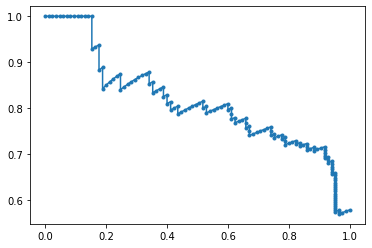

In [ ]:
reg_precision, reg_recall, _ = precision_recall_curve(y_test,reg_pred)
plt.plot(reg_recall, reg_precision, marker='.')

## LDA: Linear Discriminant Analysis

La intuición detás de LDA es que se busca minimizar la distancia entre cada clase y maximizar la distancia entre las clases. 


1. Se obtiene la matriz $S$

$$S = W^{-1} B$$

 - La matriz $W$ es el promedio de las matrices de covarianza within. 
 - La matriz $B$ es igual a
 $$T=B+W$$
 $$B=T-W$$

 Esta hace referencia a la matriz de covarianzas between.
 - Con esta información ya se puede obtener la matriz $S$.

2. Se obtienen los eigenvalores y los eigenvectores de la matriz S

3. Se proyecta la matrix $X$ sobre los eigenvectores (los eigenvectores pueden ser normalizados con la raíz cuadrada de la varianza agrupada)

4. Los valores obtenidos son modelados a partir de una función de densidad normal. A partir de allí se calculan las probabilidades de que pertenezca a una clase determinada utilizando el teorema de Bayes.

$$P(G=k|X=x)=\frac{f_k(x)\pi_k}{\sum_{l=1}^K f_l(x)\pi_l}$$

Donde se asume que 

$$f_k(x)=\frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}e^{-\frac{1}{2}(x-\mu_k)^{T}\Sigma_k^{-1}(x-\mu_k)}$$

Se observa LDA cuando se tiene una matriz de covarianzas común $\Sigma_k=\Sigma\forall k$.

En un caso donde se tienen solo dos clases $k$ y $l$, se puede observar el log-ratio y se tiene:

$$\log\frac{P(G=k|X=x)}{P(G=l|X=x)}=\log\frac{f_k(x)}{f_l(x)}+\log\frac{\pi_k}{\pi_l}$$
$$=\log\frac{\pi_k}{\pi_l}-\frac{1}{2}(\mu_k+\mu_l)^T\Sigma^{-1}(\mu_k-\mu_l)+x^T\Sigma^{-1}(\mu_k-\mu_l)$$

Esto es una ecuación lineal en $x$. Esta función linear de log-odds implica que el límite de decisión entre las clases $k$ y $l$ (conjunto en el cual las probabilidades son iguales) son lineales en $x$ y en $p$ dimensiones un hiperplano.

Los parámetros de la distribución Gaussiana no son conocidos en la práctica. Es necesario estimarlos:

$$\hat{\pi}_k=N_k/N$$
$$\hat{\mu}=\sum_{gi=k}x_i/N_k$$
$$\hat{\Sigma}=\sum_{k=1}^K\sum_{gi=k}(x_i-\hat{\mu}_k)(x_i-\hat{\mu}_k)^T/(N-K)$$

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
model_lda = LDA.predict_proba(X_train)

In [ ]:
LDA.predict_proba(X_test)[:5]

array([[0.43431813, 0.56568187],
       [0.53442752, 0.46557248],
       [0.40070172, 0.59929828],
       [0.05696971, 0.94303029],
       [0.27357563, 0.72642437]])

In [ ]:
model_lda[:5]

array([[0.73157385, 0.26842615],
       [0.91914492, 0.08085508],
       [0.15473615, 0.84526385],
       [0.10211599, 0.89788401],
       [0.33399896, 0.66600104]])

In [ ]:
y_pred = LDA.predict(X_test)

In [ ]:
y_pred[:5]

array([1, 0, 1, 1, 1])

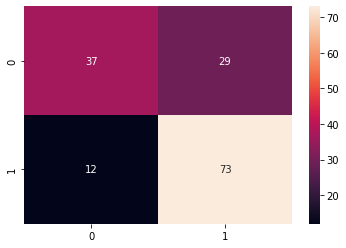

In [ ]:
cm_lda = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_lda, annot=True)

In [ ]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')

Accuracy_score: 0.7284768211920529
Recall score: 0.8588235294117647
F1 score: 0.7807486631016043
Precision score: 0.7156862745098039


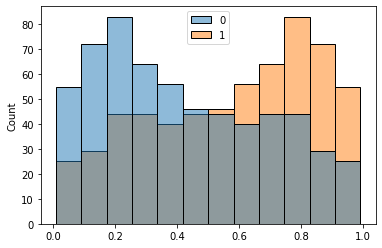

In [ ]:
sns.histplot(model_lda)

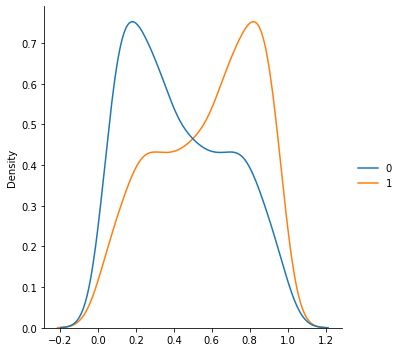

In [ ]:
sns.displot(model_lda, kind='kde')

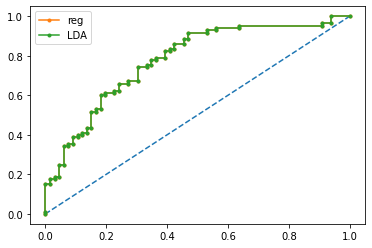

In [ ]:
lda_proba = LDA.predict_proba(X_test)[:, 1]
lda_auc = roc_auc_score(y_test, lda_proba)

lda_fpr, lda_tpr, _ = roc_curve(y_test, lda_proba)

plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(reg_fpr,reg_tpr, marker='.',label='reg')
plt.plot(lda_fpr,lda_tpr, marker='.',label='LDA')
plt.legend()

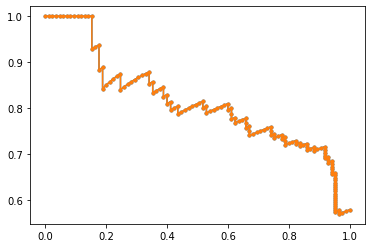

In [ ]:
lda_precision, lda_recall, _ = precision_recall_curve(y_test,lda_proba)
plt.plot(reg_recall, reg_precision, marker='.')
plt.plot(lda_recall, lda_precision, marker='.')

## Regresión logística

Se tiene

$$h_\beta(x)=g(\textbf{X}\textbf{b})=p(y=1|\textbf{X};\textbf{b})$$
$$g(z)=\frac{1}{1+e^{-z}}$$

Esta función es conocida como función logística o sigmoide.

Función de pérdida

$$J(h_\beta(x), y)=\begin{cases}
-log(h_\beta(x)) & \text{if }y=1\\
-log(1-h_\beta(x)) & \text{if }y=0
\end{cases}$$

$$-\frac{1}{m}\sum_{i=1}^my_i\log h_\beta(x_i)+(1-y_i)\log(1-h_\beta(x_i))$$

Descenso del gradiente

$$\textbf{b}:=\textbf{b}-r\sum_{i=1}^m(h_\beta(x_i)-y_i)x_i$$

Si se observa es exactamente el mismo que se tenía en la regresión lineal, la diferencia radica en que ahora la hipótesis es diferente:

$$h_\beta(x)=\frac{1}{1+e^{–\textbf{X}\textbf{b}}}$$

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=10000)

In [ ]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_log = log.predict_proba(X_train)

In [ ]:
y_pred = log.predict(X_test)

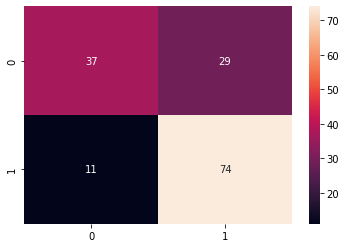

In [ ]:
cm_log = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_log, annot=True)

In [ ]:
print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')

Accuracy_score: 0.7350993377483444
Recall score: 0.8705882352941177
F1 score: 0.7872340425531914
Precision score: 0.7184466019417476


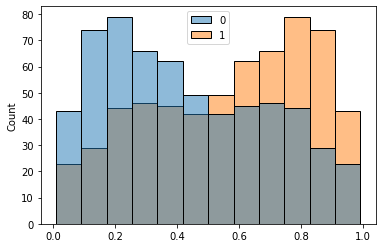

In [ ]:
sns.histplot(model_log)

In [ ]:
log.predict_proba(X_train)

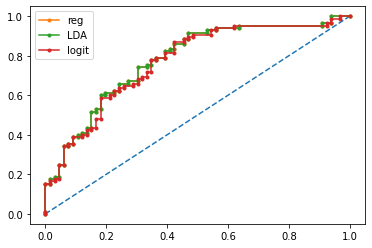

In [ ]:
log_proba = log.predict_proba(X_test)[:, 1]
log_auc = roc_auc_score(y_test, log_proba)

log_fpr, log_tpr, _ = roc_curve(y_test, log_proba)

plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(reg_fpr,reg_tpr, marker='.',label='reg')
plt.plot(lda_fpr,lda_tpr, marker='.',label='LDA')
plt.plot(log_fpr,log_tpr, marker='.',label='logit')
plt.legend()

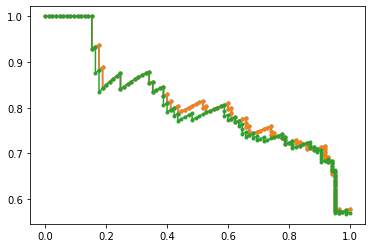

In [ ]:
log_precision, log_recall, _ = precision_recall_curve(y_test,log_proba)
plt.plot(reg_recall, reg_precision, marker='.')
plt.plot(lda_recall, lda_precision, marker='.')
plt.plot(log_recall, log_precision, marker='.')

In [ ]:
print(reg_auc)
print(lda_auc)
print(log_auc)

0.7789661319073082
0.7789661319073082
0.770409982174688


In [ ]:
accuracy_score(y_train, LDA.predict(X_train)), accuracy_score(y_test, LDA.predict(X_test))

(0.729235880398671, 0.7284768211920529)

In [ ]:
accuracy_score(y_train, log.predict(X_train)), accuracy_score(y_test, log.predict(X_test))

(0.7308970099667774, 0.7350993377483444)